# 1. Looking at a Big Picture

What is Our Problem
Our problem is to predict whether the passenger with given set of characteristics will survive the crisis or not. We have to give answer the problem in Yes or No.

Select the Performance Measure
Our performance measure will be 'Accuracy'.
Accuracy = No. of correct predictions * 100/ Total number of predictions

Check the Assumptions
I) We are assuming that passenger will either survive or will die in the crisis. That is, the output will be binary only.

# 2. Get the Data

## 2.1 Import the Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 2.2 Getting the training data

In [2]:
data = pd.read_csv('train.csv')

# 3. Explore the Data

In [3]:
df = data.copy()

## 3.1 Study each attribute and its characteristics

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

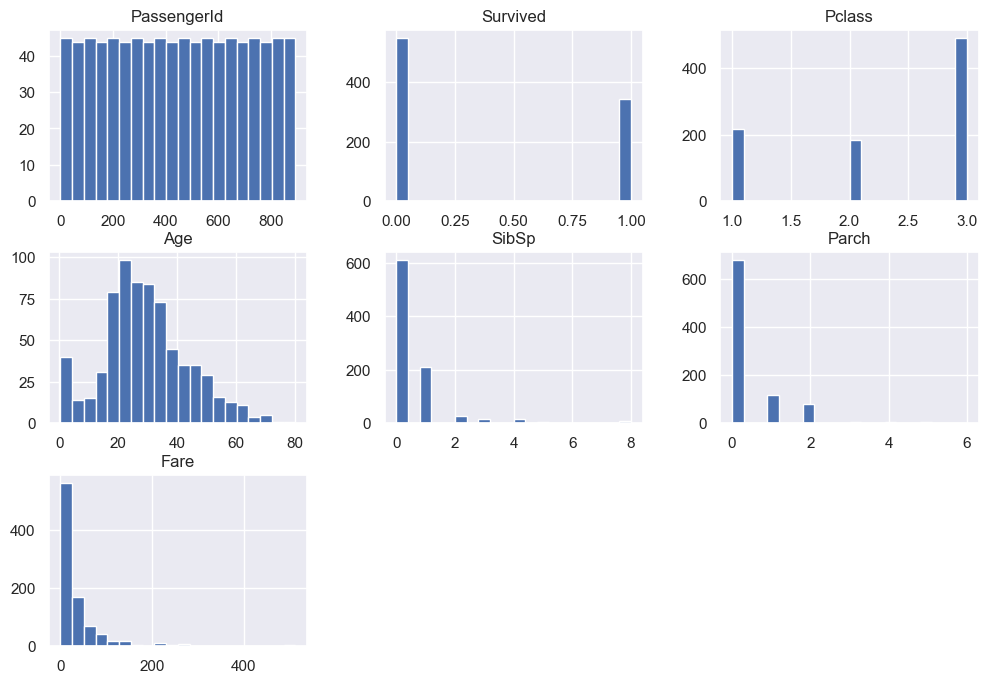

In [76]:
df.hist(bins=20, figsize=(12, 8))

PassengerId => 0 missing, uniform, Not useful

Survived => 0 missing, binary, Useful => Target variable

Pclass => 0 missing, categorical, Useful

Name => 0 missing, Not useful

Sex => 0 missing, categorical, Useful

Age => 177 missing, kind of normal but slight right skew, Useful

SibSp => 0 missing, right skew, Useful

Parch => 0 missing, right skew, Useful

Ticket => 0 missing, Not useful

Fare => 0 missing, right skewed, Useful

Cabin => 687 missing, Not useful

Embarked => 0 missing, Not useful

## 3.2 Study Correlation between attributes

In [77]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Survived => Fare (0.26)

Not much correlation problem can be seen

## 3.3 Some Conclusions

Target Variable => Survived

Useful => Pclass, Sex, Age, SibSp, Parch, Fare

We will do the median imputation for missing values

For Pclass, reverse the order of categories i.e change 1->3, 2->2 and 3->1 so that first class passengers have higher priority and so on

Correlation problems are not that enough, hence ignore

On Fare, we may use log or square root transformations

# 4. Prepare the Data For Machine Learning

## 4.1 Function to perfrom the data preparing

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def DataPreparer(raw_data):
    def CommonProcessing(train_x):
        train_x['Pclass'] = train_x['Pclass'].map({1:3, 2:2, 3:1})
        log_transformer = FunctionTransformer(func= lambda x: np.log(x+1), validate=True)
        preprocessor_1 = ColumnTransformer(
            transformers=[
                ('age_imputer', SimpleImputer(strategy='median'), ['Age']),
                ('scaler', StandardScaler(), ['Age', 'Fare', 'SibSp', 'Parch'])
            ], remainder='passthrough'
        )
        processed_train_x = pd.DataFrame(preprocessor_1.fit_transform(train_x), columns=['drop_age', 'Age', 'Fare', 'SibSp', 'Parch', 'Pclass']).drop(['drop_age'], axis=1)
        return processed_train_x
    
    if('Survived' in raw_data.columns.values): ## Use to differential wether the raw_data is training data or it is test data. If survived is present as a column in the raw_data then the data is of the training
        raw_data = raw_data[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']] 
        train_x = raw_data.drop(['Survived'], axis=1)
        train_y = raw_data['Survived']
        processed_train_x = CommonProcessing(train_x)
        train_imputer = SimpleImputer(strategy='median')
        processed_train_x = pd.DataFrame(train_imputer.fit_transform(processed_train_x), columns=['Age', 'Fare', 'SibSp', 'Parch', 'Pclass'])
        
        return processed_train_x, train_y

    else: ## Will be invoked if the data is for test
        raw_data = raw_data[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]
        processed_train_x = CommonProcessing(raw_data)
        test_imputer = SimpleImputer(strategy='median')
        processed_train_x = pd.DataFrame(test_imputer.fit_transform(processed_train_x), columns=['Age', 'Fare', 'SibSp', 'Parch', 'Pclass'])
        
        return processed_train_x
    

In [48]:
train_x, train_y = DataPreparer(df)

In [49]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   Fare    891 non-null    float64
 2   SibSp   891 non-null    float64
 3   Parch   891 non-null    float64
 4   Pclass  891 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB


# 5. Training the Model

## 5.0 Defining the function to give cross validation results

In [29]:
def cross_validation_results_summary(score_array):
    print(f"--------------------------------")
    print(f"The mean of cv scores is: {round(score_array.mean(), 3)}")
    print(f"The standard deviation of cv scores is: {round(score_array.std(), 3)}")
    print(f"--------------------------------")

## 5.1 Training the Logistic Regression Model

In [51]:
print(f"The number of 0s in train_y are {np.sum(train_y==0)} and number of 1s are {np.sum(train_y==1)}")

The number of 0s in train_y are 549 and number of 1s are 342


The dataset is kind of imbalanced hence we must use `StratifiedKFold` for cross validation

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

stratified_cv = StratifiedKFold(n_splits=5)
logit_reg = LogisticRegression()

logit_cv_scores = cross_val_score(estimator=logit_reg, X=train_x, y=train_y, cv=stratified_cv)

cross_validation_results_summary(logit_cv_scores)

--------------------------------
The mean of cv scores is: 0.696
The standard deviation of cv scores is: 0.031
--------------------------------


## 5.2 Training the SGDclassifier model

In [54]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

sgd_cv_scores = cross_val_score(estimator=sgd_clf, X=train_x, y=train_y, cv=stratified_cv)

cross_validation_results_summary(sgd_cv_scores)

--------------------------------
The mean of cv scores is: 0.667
The standard deviation of cv scores is: 0.036
--------------------------------


The above cv scores are based on the performance metric `accuracy` which is not best for classifiers, hence we must go for `Confusion Matrix`

In [59]:
# Function to Create Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

def Confusion_Matrix_Creator(actual_labels, predicted_lables):
    conf_matrix = confusion_matrix(actual_labels, predicted_lables)
    disp = ConfusionMatrixDisplay(conf_matrix)
    disp.plot(cmap='Blues')
    print(f"------------------------------------")
    print(f"The Precision is: {round(precision_score(actual_labels, predicted_lables), 3)}")
    print(f"The Recall is: {round(recall_score(actual_labels, predicted_lables), 3)}")
    print(f"------------------------------------")

------------------------------------
The Precision is: 0.582
The Recall is: 0.465
------------------------------------


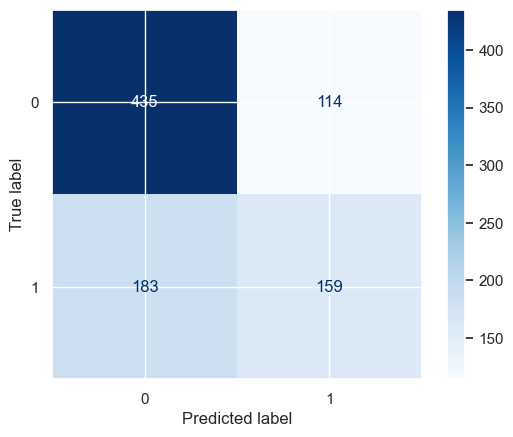

In [58]:
from sklearn.model_selection import cross_val_predict

sgd_predictions = cross_val_predict(estimator=sgd_clf, X=train_x, y=train_y, cv=stratified_cv)
Confusion_Matrix_Creator(train_y, sgd_predictions)

When the SGDclassifier CLAIMS that the person is survived then it is correct 58% times.

The SGDclassifier detects only 46% of the actual survived persons

The precision is more important for me

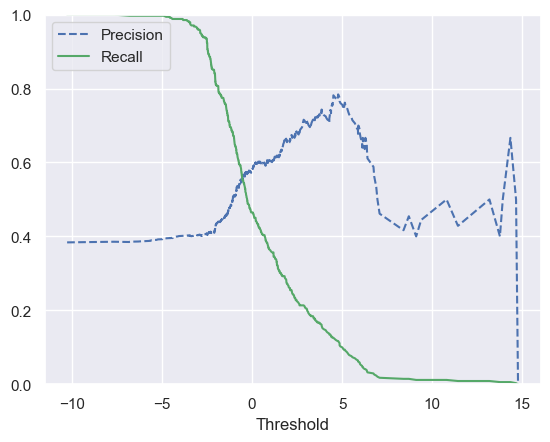

In [88]:
# Increasing Threshold to increase Precision
from sklearn.metrics import precision_recall_curve

y_decision_scores = cross_val_predict(estimator=sgd_clf, X=train_x, y=train_y, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(train_y, y_decision_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Text(0, 0.5, 'Precision')

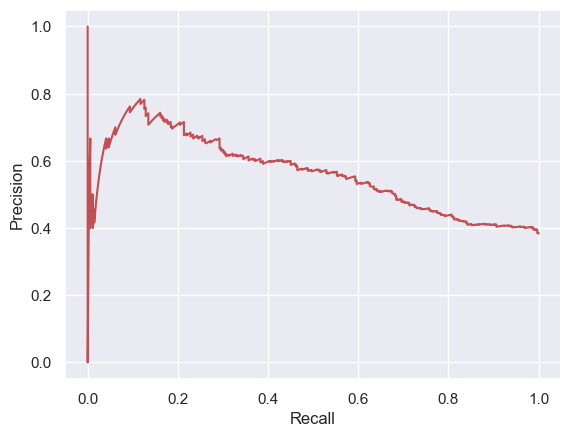

In [99]:
plt.plot(recalls, precisions, 'r-')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [100]:
y_predicted_precision_80 = (y_decision_scores > 5) ## Threshold = 5 taken from first graph
precision_value = precision_score(train_y, y_predicted_precision_80)
recall_value = recall_score(train_y, y_predicted_precision_80)
print(f"At threshold = 5, Precision: {precision_value}, Recall: {recall_value}")

At threshold = 5, Precision: 0.7555555555555555, Recall: 0.09941520467836257


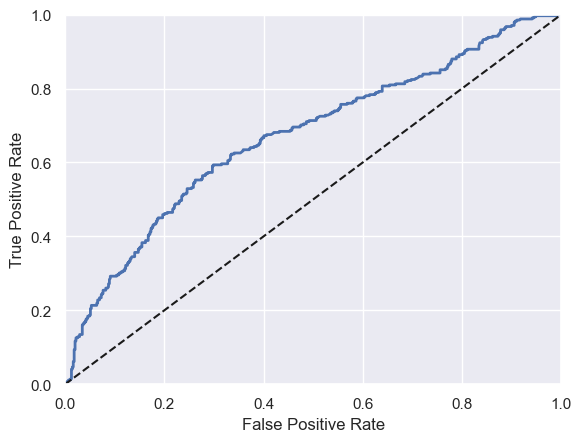

In [102]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_y, y_decision_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)

In [103]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_y, y_decision_scores)

0.6703123169185866

# 6. Testing the model on test data

In [167]:
test_raw_data = pd.read_csv('test.csv')

In [168]:
test_raw_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [169]:
test_x = DataPreparer(test_raw_data)

C:\Users\hp\AppData\Local\Temp\ipykernel_23588\2617213789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['Pclass'] = train_x['Pclass'].map({1:3, 2:2, 3:1})


In [170]:
test_x.head()

,Age,Fare,SibSp,Parch,Pclass
0,0.298549,-0.497811,-0.499470,-0.400248,1.0
1,1.181328,-0.512660,0.616992,-0.400248,1.0
2,2.240662,-0.464532,-0.499470,-0.400248,2.0
3,-0.231118,-0.482888,-0.499470,-0.400248,1.0
4,-0.584229,-0.417971,0.616992,0.619896,1.0


In [171]:
predicted_outputs = logit_reg.predict(test_x)

In [172]:
predicted_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [173]:
prediction_df = pd.DataFrame(data={'PassengerId': test_raw_data['PassengerId'], 'Survived': predicted_outputs})

In [174]:
prediction_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [175]:
prediction_df.to_csv('Predicted_outputs.csv')